In [12]:
import matplotlib.pyplot as plt
import random
import pandas as pd
import os

In [2]:
from utils.data_loader import fetch_yf_stock_data, add_technical_indicator

In [8]:
ticker = 'DFDV'

In [9]:
df_cur = fetch_yf_stock_data(ticker, interval='15m', period='60d', auto_adjust=False)

[*********************100%***********************]  1 of 1 completed


In [19]:
pricefile = f"./data/{ticker}15m_yfprice.csv"
if os.path.isfile(pricefile):
    df_last = pd.read_csv(pricefile, index_col=0)
    df_last.index = pd.to_datetime(df_last.index).strftime("%Y-%m-%d %H:%M:%S")
    df_last.reset_index(inplace=True)
    last_day = df_last['Datetime'].iloc[0]
    df_last.to_csv(f"./data/{ticker}T15m_yfprice_{last_day.replace('-', '').replace(' ', '').replace(':', '')}.csv", index=False)
else:
    df_last = pd.DataFrame()
    last_day = pd.to_datetime(df_cur.index[-1])
last_day

'2025-05-21 19:45:00'

In [20]:
df_cur.reset_index(inplace=True)
last_day_idx = df_cur['Datetime'].to_list().index(last_day)
df_cur = df_cur.iloc[:last_day_idx]
if len(df_cur) == 0:
    df_new = df_last
else:
    df_new = pd.concat([df_cur, df_last], ignore_index=False)
df_new.index = df_new['Datetime']
df_final = df_new.drop(['Datetime'], axis=1)

In [21]:
df_final.to_csv(pricefile)

In [22]:
df_ta = add_technical_indicator(df_final[::-1])
df_ta.tail()

,Adj Close,Close,High,Low,Open,Volume,bb_bbm,bb_bbh,bb_bbl,bb_bbhi,...,MACD_signal,MACD_diff,MACDD_sign,MACDD_sign_shift,MACDD_sign_signal,WilliamsR,WilliamsR_signal,sma50,sma200,sma_signal
Datetime,,,,,,,,,,,,,,,,,,,,,
2025-05-23 18:45:00,35.321602,35.321602,35.471500,34.590000,34.599998,26522,35.23144,38.205952,32.256927,0.0,...,-1.439558,0.247581,1,1.0,0,-22.753431,0,40.224546,24.443094,1
2025-05-23 19:00:00,33.855000,33.855000,35.009998,33.660000,35.009998,32710,35.04169,37.854648,32.228732,0.0,...,-1.395930,0.174516,1,1.0,0,-57.530747,0,40.185626,24.545269,1
2025-05-23 19:15:00,34.400002,34.400002,34.450001,33.799999,33.939999,23336,34.78419,36.698581,32.869799,0.0,...,-1.354160,0.167078,1,1.0,0,-51.351279,0,40.163958,24.649691,1
2025-05-23 19:30:00,34.029999,34.029999,34.799999,33.880001,34.500000,30932,34.66903,36.470618,32.867442,0.0,...,-1.318562,0.142391,1,1.0,0,-71.742359,0,40.109858,24.750547,1
2025-05-23 19:45:00,34.150002,34.150002,34.529999,33.529999,33.755001,66864,34.57653,36.282718,32.870342,0.0,...,-1.283779,0.139133,1,1.0,0,-73.630105,0,39.962558,24.854154,1


In [81]:
def plot_lines(df, cols, st_idx):
    plt.figure(figsize=(12,3))
    x = pd.to_datetime(df.index[st_idx:])
    
    for col in cols:
        colors = (random.random(),random.random(),random.random())
        y = df[col].iloc[st_idx:]               
        plt.plot(x, y, color=colors)
    plt.legend(cols, loc='lower left')
    plt.show()

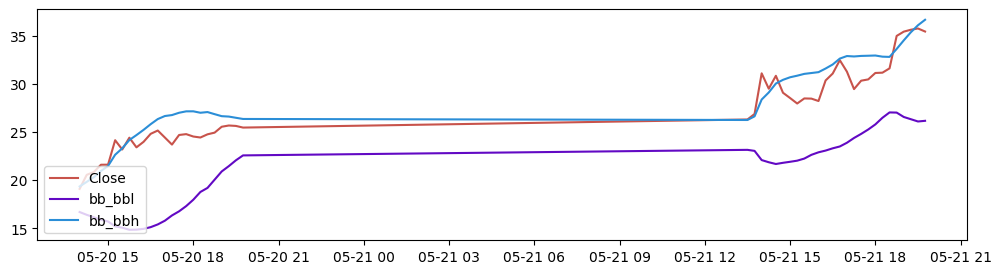

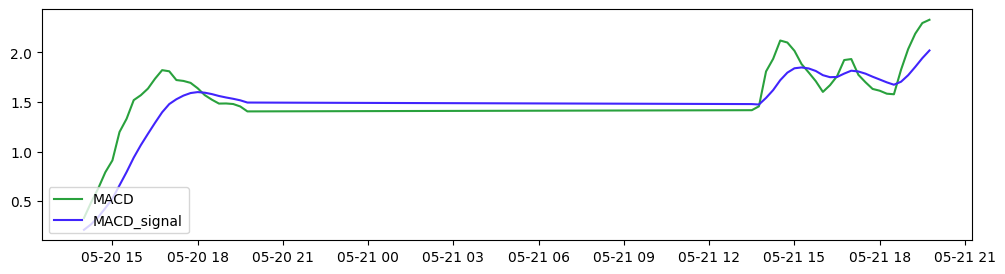

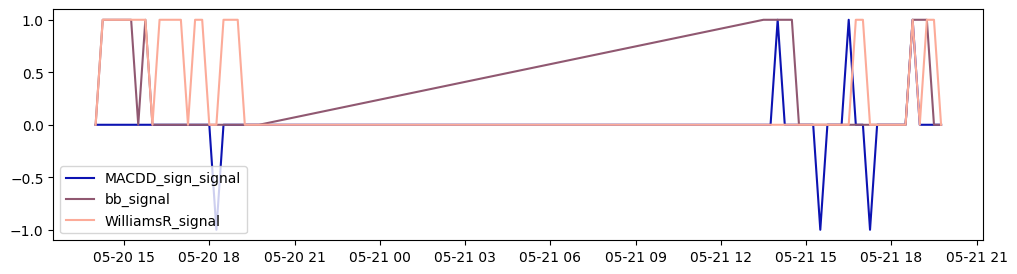

In [82]:
st_idx = -50
plot_lines(df_DFDV_ta, ['Close','bb_bbl','bb_bbh'], st_idx)
plot_lines(df_DFDV_ta, ['MACD','MACD_signal'], st_idx)
plot_lines(df_DFDV_ta, ['MACDD_sign_signal','bb_signal', 'WilliamsR_signal'], st_idx)

In [83]:
from utils.data_loader import fetch_investing_news_data, fetch_yfinance_news_data

In [84]:
import pandas as pd
end_datetime = pd.to_datetime(df_DFDV.index[-1])
# end_datetime = pd.to_datetime('2025-05-06 13:30:00')
end_datetime

Timestamp('2025-05-06 13:30:00')

In [85]:
df_DFDV_investing = fetch_investing_news_data('DFDV', end_datetime=end_datetime)

News collected from 2025-05-21 12:49:10 to 2025-05-07 23:00:05


In [ ]:
df_DFDV_investing

In [21]:
df_DFDV_investing.to_csv('./data/DFDV_news_investing_052125.csv')

In [48]:
df_DFDV_yfinance = fetch_yfinance_news_data('DFDV', end_datetime=end_datetime)

News Collecting...
News collected from 2025-05-14 20:00:00 to 2025-05-09 23:05:00


In [49]:
df_DFDV_yfinance.to_csv('./data/DFDV_news_yfinance_051425.csv')

In [86]:
from transformers import pipeline

pipe = pipeline('text-classification', model='mrm8488/distilroberta-finetuned-financial-news-sentiment-analysis')
result_map = {'LABEL_0': 'neutral', 'LABEL_1': 'negative', 'LABEL_2': 'neutral', 'LABEL_3': 'positive'}

Device set to use cuda:0


In [87]:
investing_sc = df_DFDV_investing['headline'].apply(pipe).tolist()

You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


In [88]:
investing_sc

[[{'label': 'neutral', 'score': 0.9998723268508911}],
 [{'label': 'positive', 'score': 0.9995121955871582}],
 [{'label': 'positive', 'score': 0.9996019005775452}],
 [{'label': 'neutral', 'score': 0.9998923540115356}],
 [{'label': 'neutral', 'score': 0.9998778104782104}],
 [{'label': 'positive', 'score': 0.9935829043388367}],
 [{'label': 'neutral', 'score': 0.9998942613601685}],
 [{'label': 'neutral', 'score': 0.9995884299278259}],
 [{'label': 'neutral', 'score': 0.9998639822006226}],
 [{'label': 'neutral', 'score': 0.9998778104782104}],
 [{'label': 'positive', 'score': 0.9745720028877258}],
 [{'label': 'neutral', 'score': 0.999778687953949}],
 [{'label': 'neutral', 'score': 0.9998797178268433}],
 [{'label': 'neutral', 'score': 0.9998260140419006}]]

In [89]:
def get_sentiment_score(df, pipe):

  def process_score(x):
    if x['label'] == 'negative':
      return -1
    elif x['label'] == 'neutral':
      return 0
    else:
      return x['score']

  senti_sc = df['headline'].apply(pipe).tolist()
  df_senti_sc = pd.DataFrame(senti_sc)
  df_senti_sc = df_senti_sc[0].apply(process_score)
  df_senti_sc.rename('senti_sc', inplace=True)
  return df.join(df_senti_sc)

In [93]:
df_investing_result = get_sentiment_score(df_DFDV_investing, pipe)
df_investing_result.index = pd.to_datetime(df_investing_result['Datetime'])

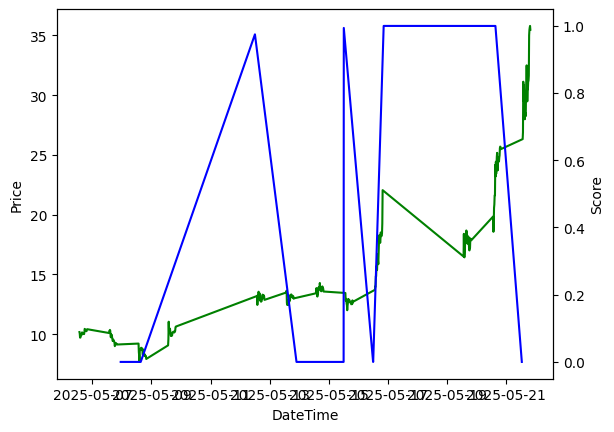

In [95]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(pd.to_datetime(df_DFDV.index), df_DFDV['Adj Close'], 'g-')
ax2.plot(pd.to_datetime(df_investing_result['Datetime']), df_investing_result['senti_sc'], 'b-')

ax1.set_xlabel('DateTime')
ax1.set_ylabel('Price')
ax2.set_ylabel('Score')

plt.show()